In [11]:
import matplotlib.pyplot as plt

from prep_terrain_data import make_terrain_data
from class_vis import pretty_picture
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score as acc_sco
from time import time

In [12]:
features_train, labels_train, features_test, labels_test = make_terrain_data()

the training data (`features_train`, `labels_train`) have both `"fast"` and `"slow"` points mixed together --- separate them so we can give them different colors in the scatterplot and identify them visually

In [13]:
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii] == 0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii] == 0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii] == 1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii] == 1]

initial visualization

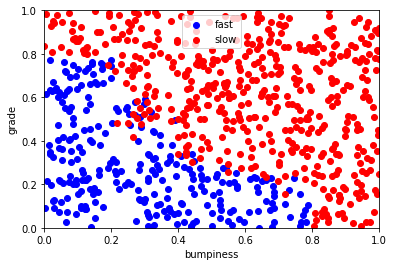

In [14]:
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

## ↓↓↓ Your Code Goes Here ↓↓↓

name your classifier object `clf` if you want the visualization code `pretty_picture` to show you the decision boundary

In [34]:
# create a random forest classifier, noting the training time
clf = RFC(n_estimators=10000, max_features="log2")
t0 = time()
clf.fit(features_train, labels_train)
training_time = round(time() - t0, 3)

In [35]:
# use the clf to predict the test dataset, noting the prediction time
t0 = time()
pred = clf.predict(features_test)
pred_time = round(time() - t0, 3)

In [36]:
# check the accuracy of the forest
accuracy = acc_sco(labels_test, pred)

In [37]:
# print results
print("training:", training_time, "sec")
print("predict:", pred_time, "sec")
print("accuracy:", accuracy)

training: 10.532 sec
predict: 0.752 sec
accuracy: 0.92


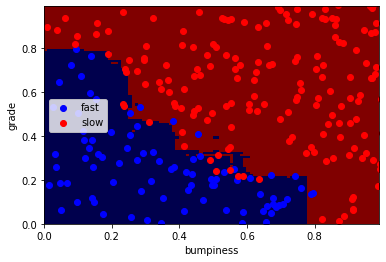

In [38]:
try:
    pretty_picture(clf, features_test, labels_test)
except NameError:
    pass